# IMPORT ALL REQUIREMENTS

In [1714]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from xgboost import XGBClassifier

## import data csv

In [1715]:
# df = pd.read_csv("./Data Color.csv")
# df = pd.read_excel("./data_uang_gemastik.xlsx")
df = pd.read_csv("./data_colors.csv")

In [1716]:
df

,red_freq,green_freq,blue_freq,value
0,78,89,71,10000
1,78,89,71,10000
2,79,89,73,10000
3,79,89,73,10000
4,80,89,72,10000
...,...,...,...,...
2527,92,105,94,1000
2528,87,106,100,1000
2529,90,106,94,1000
2530,78,88,80,1000


In [1717]:
df.dtypes

red_freq      int64
green_freq    int64
blue_freq     int64
value         int64
dtype: object

# EDA

## Data Preprocessing and Feature Engineering

In [1718]:
# drop the date time column

# df = df.drop(columns=["Date", "Time"])
df.dropna(inplace=True)

In [1719]:
display(df)

,red_freq,green_freq,blue_freq,value
0,78,89,71,10000
1,78,89,71,10000
2,79,89,73,10000
3,79,89,73,10000
4,80,89,72,10000
...,...,...,...,...
2527,92,105,94,1000
2528,87,106,100,1000
2529,90,106,94,1000
2530,78,88,80,1000


In [1720]:
for column in df.columns:
    if df[column].dtype == 'float64':
        df[column] = df[column].apply(lambda x: round(x)).astype(int)
df['value'] = df['value'].apply(lambda x: round(x)).astype(int).astype(str)

# df['red_freq'] = df['red_freq']*2
# df['green_freq'] = df['green_freq']*2
# df['blue_freq'] = df['blue_freq']*2

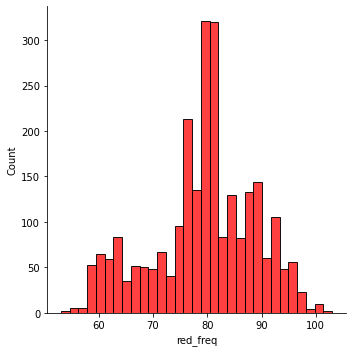

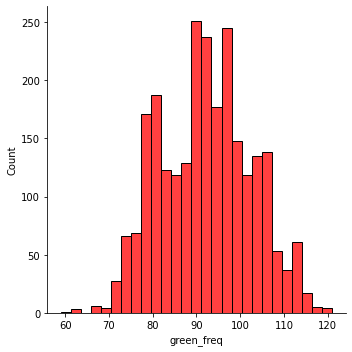

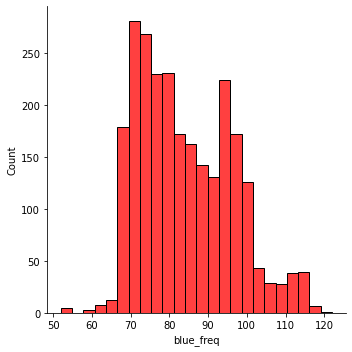

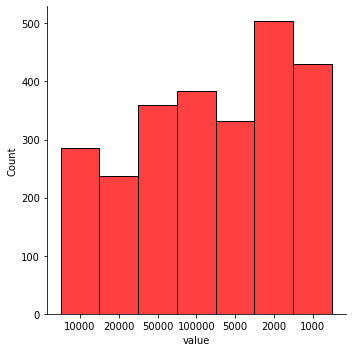

In [1721]:
for i in df.columns:
    sns.displot(data=df[i], color="red")

In [1722]:
display(df)

,red_freq,green_freq,blue_freq,value
0,78,89,71,10000
1,78,89,71,10000
2,79,89,73,10000
3,79,89,73,10000
4,80,89,72,10000
...,...,...,...,...
2527,92,105,94,1000
2528,87,106,100,1000
2529,90,106,94,1000
2530,78,88,80,1000


In [1723]:
## scaling dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [1724]:
# memex = MinMaxScaler()
# col = ["Red Freq", "Blue Freq", "Green Freq"]
# df[col] = memex.fit_transform(df[col])
# display(df)

## Feature Engineering

setelah melihat pola pada nilai frekuensi r,g, dan b. ditemukan kemiripan untuk selisih r-g, r-b, dan g-b. maka akan dibuat feature baru pada data

In [1725]:
df["r-g"] = df["red_freq"] - df["green_freq"]
df["r-b"] = df["red_freq"] - df["blue_freq"]
df["g-b"] = df["green_freq"] - df["blue_freq"]
# df["rgb"] = df["red_freq"]*df["green_freq"]*df["blue_freq"]
# df["r+g+b"] = df["red_freq"]+df["green_freq"]+df["blue_freq"]
df

,red_freq,green_freq,blue_freq,value,r-g,r-b,g-b
0,78,89,71,10000,-11,7,18
1,78,89,71,10000,-11,7,18
2,79,89,73,10000,-10,6,16
3,79,89,73,10000,-10,6,16
4,80,89,72,10000,-9,8,17
...,...,...,...,...,...,...,...
2527,92,105,94,1000,-13,-2,11
2528,87,106,100,1000,-19,-13,6
2529,90,106,94,1000,-16,-4,12
2530,78,88,80,1000,-10,-2,8


# Modelling

In [1726]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, roc_auc_score, auc, roc_curve, recall_score, confusion_matrix

df.dropna(inplace=True)



In [1727]:
X = df.drop(columns="value")
y = df["value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

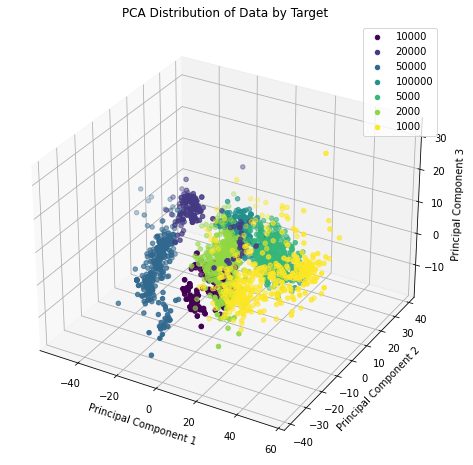

In [1728]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# Instantiate PCA with the desired number of components
pca = PCA(n_components=3)  # You can choose 2 or 3 components for 2D or 3D visualization

# Fit and transform your data
pca_result = pca.fit_transform(X)
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['Target'] = y

colors = plt.cm.viridis(np.linspace(0, 1, len(pca_df['Target'].unique())))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the data points with colors based on class
for i, target_class in enumerate(pca_df['Target'].unique()):
    subset = pca_df[pca_df['Target'] == target_class]
    ax.scatter(subset['PCA1'], subset['PCA2'], subset['PCA3'], label=f'{target_class}', c=[colors[i]])

# Add labels and a legend
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('PCA Distribution of Data by Target')
plt.legend()

plt.show()
# sns.scatterplot(x='PCA1', y='PCA2', hue='Target', data=pca_df, palette='viridis', legend='full')
# plt.title('PCA Distribution of Data by Target')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
plt.show()

In [1729]:
display(X_train)
display(y_train)

,red_freq,green_freq,blue_freq,r-g,r-b,g-b
2145,74,92,91,-18,-17,1
1647,79,92,85,-13,-6,7
436,77,79,78,-2,-1,1
1033,74,77,67,-3,7,10
2249,90,110,104,-20,-14,6
...,...,...,...,...,...,...
1638,88,94,86,-6,2,8
1095,67,88,79,-21,-12,9
1130,59,79,70,-20,-11,9
1294,84,106,102,-22,-18,4


2145      1000
1647      2000
436      20000
1033     50000
2249      1000
         ...  
1638      2000
1095    100000
1130    100000
1294      5000
860     100000
Name: value, Length: 1519, dtype: object

In [1730]:
# decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42, max_depth=12, n_estimators=350)
svc = SVC(kernel="linear", random_state=42)
# logistic_regression = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=55)
models = [ ("Random Forest", random_forest), ("SVC", svc), ("KNN", knn) ]
# xgb = XGBClassifier(learning_rate = 0.1, gamma = 0.1, max_depth = 12, n_estimators = 400)
# xgb_model = ("XGBoost", xgb)

In [1731]:
from sklearn.preprocessing import LabelEncoder

label = {
    "1000":0,
    "2000":1,
    "5000":2,
    "10000":3,
    "20000":4,
    "50000":5,
    "100000":6
}

# Create a custom LabelEncoder class
class CustomLabelEncoder(LabelEncoder):
    def __init__(self, label_dict):
        self.label_dict = label_dict
        super().__init__()

    def fit(self, y):
        super().fit(y)
        self.classes_ = [self.label_dict[label] for label in self.classes_]

    def transform(self, y):
        return super().transform(y)

    def inverse_transform(self, y):
        y_original = [list(self.label_dict.keys())[list(self.label_dict.values()).index(encoded)] for encoded in y]
        return y_original
    

# Initialize the LabelEncoder
# label_encoder = CustomLabelEncoder(label)

# # Fit the LabelEncoder to your target classes and transform them
# y_train_encoded = label_encoder.fit_transform(y_train)

In [1732]:
# print(y_train_encoded)

### Training

In [1733]:
for i in models:
    i[1].fit(X_train, y_train)
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# random_search.fit(X_train, y_train_encoded)

# xgb.fit(X_train, y_train_encoded)

# best_params = random_search.best_params_
# best_xgb_model = random_search.best_estimator_
# print(best_params)
# print(best_xgb_model)

# best_xgb = ("XGBoost", best_xgb_model)





### Prediction

Random Forest f1 score= 0.9525002332441138
Random Forest accuracy = 0.9526159921026653
Random Forest precision = 0.9526159921026653
Random Forest recall = 0.9526159921026653


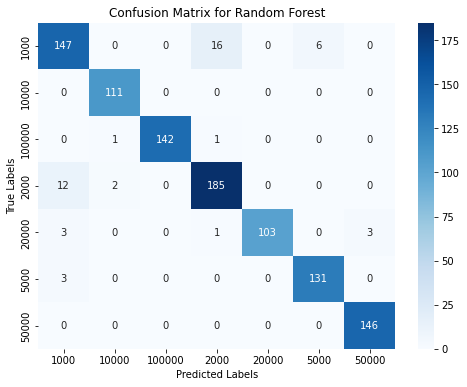

SVC f1 score= 0.9325033114091132
SVC accuracy = 0.9338598223099703
SVC precision = 0.9338598223099703
SVC recall = 0.9338598223099703


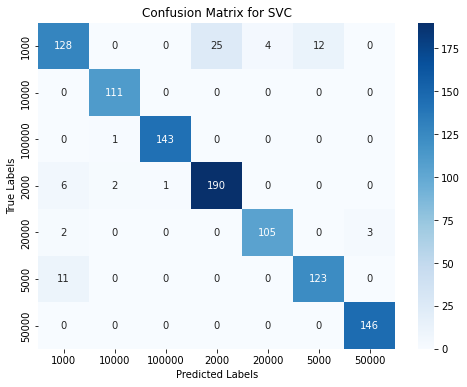

KNN f1 score= 0.9183679595951119
KNN accuracy = 0.9200394866732478
KNN precision = 0.9200394866732478
KNN recall = 0.9200394866732478


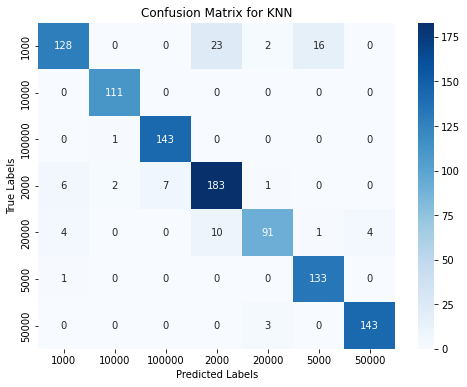

In [1734]:
# model_names = []
# y_preds = []


for model in models:    
    y_pred = model[1].predict(X_test)

    # Calculate the confusion matrix
    # confusion = confusion_matrix(y_true=y_test, y_pred=y_pred)

    # # Print the confusion matrix
    # print(f"Confusion matrix for {model[0]}:")
    # print(confusion)

    f1 = f1_score(y_true=y_test, y_pred=y_pred, average='weighted')
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    print(f"{model[0]} f1 score= {f1}")
    print(f"{model[0]} accuracy = {accuracy}")
    print(f"{model[0]} precision = {precision}")
    print(f"{model[0]} recall = {recall}")
    confusion = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=sorted(set(y_test)))
    model_name = model[0]

    # Create a heatmap for the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
                xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# y_test = label_encoder.fit_transform(y_test)


# y_pred = xgb_model[1].predict(X_test)

# Calculate the confusion matrix
# confusion = confusion_matrix(y_true=y_test, y_pred=y_pred)

# # Print the confusion matrix
# print(f"Confusion matrix for {xgb_model[0]}:")
# print(confusion)
# y_test = label_encoder.inverse_transform(y_test)
# y_pred = label_encoder.inverse_transform(y_pred)
# f1 = f1_score(y_true=y_test, y_pred=y_pred, average='weighted')
# accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
# precision = precision_score(y_test, y_pred, average='macro')
# recall = recall_score(y_test, y_pred, average='macro')
# print(f"{xgb_model[0]} f1 score= {f1}")
# print(f"{xgb_model[0]} accuracy = {accuracy}")
# print(f"{xgb_model[0]} precision = {precision}")
# print(f"{xgb_model[0]} recall = {recall}")
# print(y_pred)
# confusion = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=sorted(set(y_test)))
# xgb_model_name = xgb_model[0]

# # Create a heatmap for the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
#             xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
# plt.title(f"Confusion Matrix for {xgb_model_name}")
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.show()

### Analisis hasil prediksi

Dari hasil prediksi, model decision tree dan random forest memiliki akurasi tertinggi yaitu sekitar 95%

### pemilihan model setelah hasil analisis

In [1735]:
# model = models[1][1]
# model = KNeighborsClassifier(n_neighbors=20)
model = RandomForestClassifier(random_state=42, max_depth=12, n_estimators=400)
# model = XGBClassifier(random_state=42, learning_rate = 0.1, gamma = 0.1, max_depth = 12, n_estimators = 400)
# y = label_encoder.fit_transform(y)
print(y)
model.fit(X, y)


0       10000
1       10000
2       10000
3       10000
4       10000
        ...  
2527     1000
2528     1000
2529     1000
2530     1000
2531     1000
Name: value, Length: 2532, dtype: object


RandomForestClassifier(max_depth=12, n_estimators=400, random_state=42)

### Import model

In [1736]:
import joblib
model_filename = 'model.joblib'
joblib.dump(model, model_filename)
# model.save_model('xgboost_model.bin')# Assuming you have a trained XGBoost model object named 'model'
# model.save_model('xgboost_model.json')


['model.joblib']